# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the network of the Rock Musicians on Wikipedia. 
This is the outline for today:

* Visualization and qualitative analysis of the Rock Music Artists Network
* Properties of the network structure
* Finally some more visualizations

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into Section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in **Chapter 7**.

# Part A: Let's  visualise some more!

For the rest of the course, we will primarily use[`ForceAtlas2`](https://journals.plos.org/plosone/article%3Fid=10.1371/journal.pone.0098679), a layout algorithm which was developed by the creators of the [Gephy graph analysis software](https://gephi.org). IMHO it's the prettiest network layout algorithm & since last year it's been implemented in NetworkX, so it should be easy to use.

*Exercise 1:* Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

> * Visualize the network using NetworkX
>   * Node color should depend on the `length_of_content` attribute (see notes from last week).
>   * Node size should depend on the node *degree*
> * Play with the force atlas algorithm parameters to obtain a visualization you like. 

<div class="alert alert-block alert-info">
It's OK to use your LLM as much as needed for this exercise. The only goal is to create a nice visualization.
</div>

**Visualize the network using NetworkX**
   * Node color should depend on the `length_of_content` attribute (see notes from last week).
   * Node size should depend on the node *degree*

In [1]:
# Visualize the network using NetworkX.
import networkx as nx
import os
import re
import pickle

G = nx.DiGraph()

In [2]:
directory = "../Week_4/data/rock_performers/"

all_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".pkl")]

all_performers = [os.path.splitext(os.path.basename(f))[0] for f in all_paths]

In [3]:
performer_set = set(all_performers)

In [4]:
links_collection = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0]
    
    # Load pickled page
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    # Extract all wiki links
    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)

    filtered_links = []
    for link in all_links:
        # Skip non-people links
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        # Take the displayed name if there is a pipe
        clean_link = re.split(r'\|', link)[-1]
        clean_link = clean_link.replace(" ", "_")

        # Only keep links to known performers and avoid self-loops
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)

    links_collection[performer] = filtered_links

In [5]:
def clean_name(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name).replace(" ", "_")

all_performers = [clean_name(os.path.splitext(os.path.basename(f))[0]) for f in all_paths]
performer_set = set(all_performers)

matching_links_collection = {}

for file_path in all_paths:
    performer = clean_name(os.path.splitext(os.path.basename(file_path))[0])
    
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)
    filtered_links = []

    for link in all_links:
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        clean_link = clean_name(re.split(r'\|', link)[-1])
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)
    
    matching_links_collection[performer] = filtered_links

In [6]:
for performer in all_performers:
    # Build the path to the correct file for this performer
    file_path = os.path.join(directory, f"{performer}.pkl")
    
    with open(file_path, "rb") as f:
        text = pickle.load(f)
        length_of_content = len(text.split())  # simpler and more accurate word count

    # Add performer node with word_count attribute
    G.add_node(performer, length_of_content=length_of_content, word_count=length_of_content)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)

In [7]:
# Final clean ups:
isolated = list(nx.isolates(G))

G.remove_nodes_from(isolated)

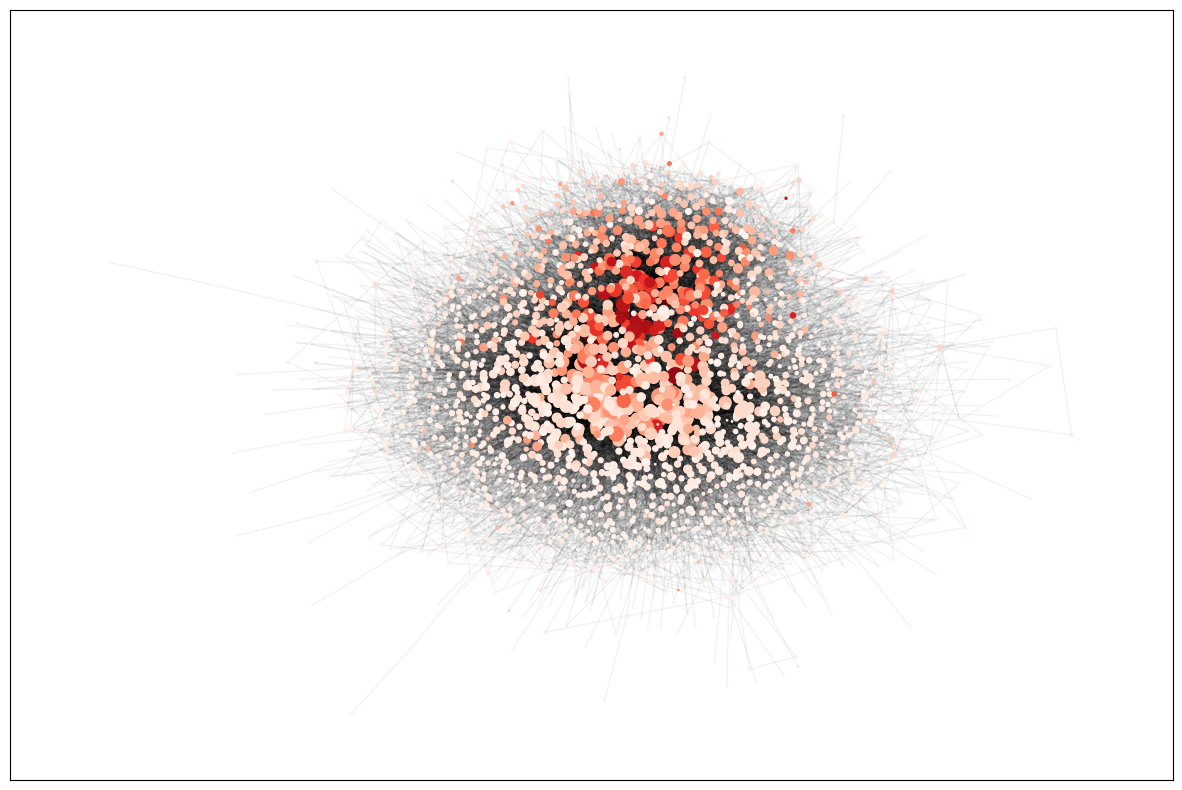

In [8]:
# Now we actually visualize the graph:
import matplotlib.pyplot as plt

G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_length_of_content = [G_undirected.nodes[node]['length_of_content'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_length_of_content,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

**Play with the force atlas algorithm parameters to obtain a visualization you like.**

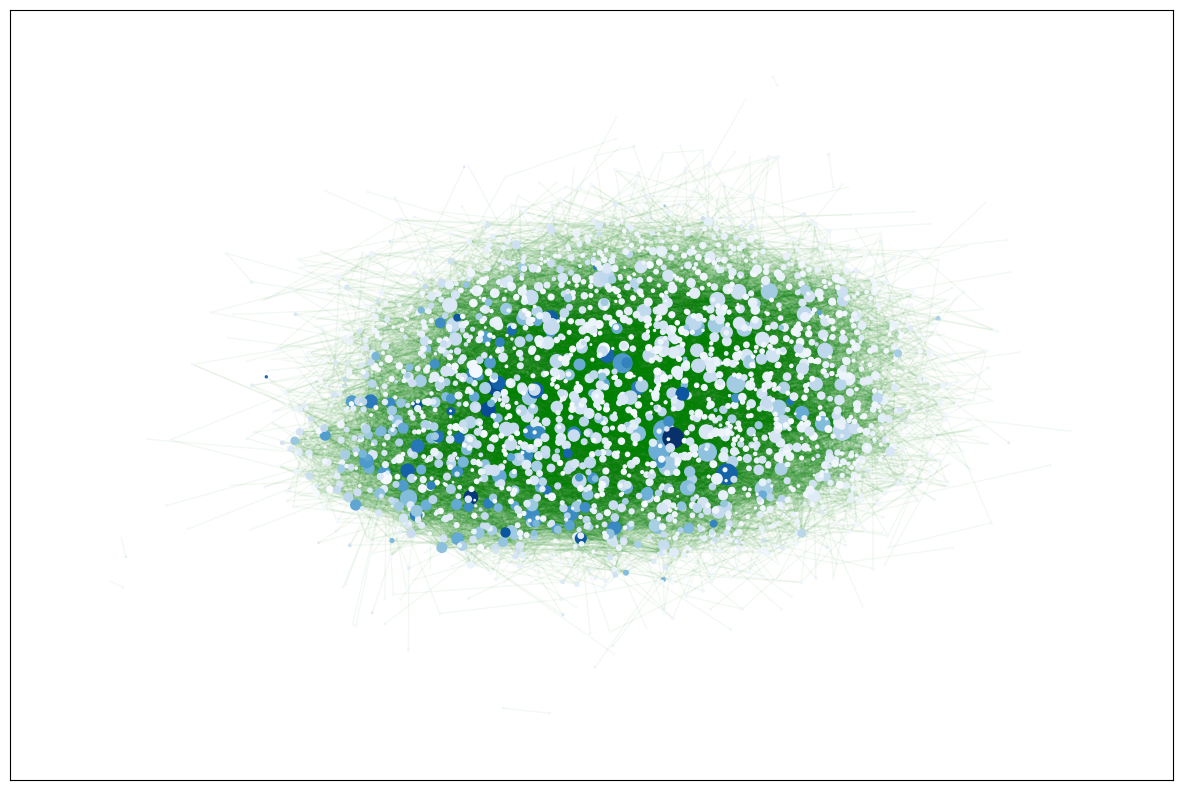

In [9]:
# Now we actually visualize the graph:
import matplotlib.pyplot as plt

G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_length_of_content = [G_undirected.nodes[node]['length_of_content'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.forceatlas2_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_length_of_content,
                                     cmap=plt.cm.Blues)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05, edge_color='green')
plt.show()

To change the color

<img src="SymPyBilleder/2025-10-01-13-18-39.png" width="350">

*Exercise 2*: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

> 1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>    * Consider the set of neighbours pointing towards the node found above. 
>    * What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
>    * Repeat the exercise for the highest out-degree node. 
>    * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
> 4. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
> 5. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
> 6. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

<div class="alert alert-block alert-info"`
For this one, I hope you'll limit your LLM use. It's OK to get help in creating the scatter plot, but use NetworkX on your own to identify nodes, and do your own reading and interpreting of Wiki pages.
</div`

> 1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>    * Consider the set of neighbours pointing towards the node found above. 
>    * What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
>    * Repeat the exercise for the highest out-degree node. 
>    * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.

In [20]:
# Prereqs (safe to re-run)
import networkx as nx
import numpy as np

assert isinstance(G, nx.DiGraph), "Use the original directed graph G (not H)."
print("Graph size:", G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")

# Degree rankings
in_deg  = dict(G.in_degree())
out_deg = dict(G.out_degree())

def top_k(d, k=10):
    return sorted(d.items(), key=lambda kv: kv[1], reverse=True)[:k]

top_in  = top_k(in_deg,  k=10)
top_out = top_k(out_deg, k=10)

print("\nTop 10 by IN-degree:")
for n, v in top_in:  print(f"  {n:35s}  in={v:4d}  out={out_deg.get(n,0):4d}")

print("\nTop 10 by OUT-degree:")
for n, v in top_out: print(f"  {n:35s}  out={v:4d}  in={in_deg.get(n,0):4d}")

top_in_node  = top_in[0][0]
top_out_node = top_out[0][0]
print("\nHighest IN-degree:", top_in_node,  "->", in_deg[top_in_node])
print("Highest OUT-degree:", top_out_node, "->", out_deg[top_out_node])


Graph size: 2400 nodes, 24535 edges

Top 10 by IN-degree:
  Elvis_Presley                        in= 208  out=  28
  Bob_Dylan                            in= 205  out=  44
  Johnny_Cash                          in= 201  out=  49
  Willie_Nelson                        in= 200  out=  58
  Dolly_Parton                         in= 157  out=  55
  Merle_Haggard                        in= 150  out=  62
  George_Jones                         in= 147  out=  56
  Emmylou_Harris                       in= 142  out=  57
  Vince_Gill                           in= 132  out=  79
  Hank_Williams                        in= 129  out=  42

Top 10 by OUT-degree:
  Hillary_Lindsey                      out=  98  in=   9
  Pam_Tillis                           out=  84  in=  45
  Carrie_Underwood                     out=  83  in=  76
  Vince_Gill                           out=  79  in= 132
  Dwight_Yoakam                        out=  78  in=  71
  Randy_Travis                         out=  76  in=  50
  Alice

In [21]:

# Helper to print neighbors with clickable URLs
def wiki_url(name): 
    return f"https://en.wikipedia.org/wiki/{name}"

def neighbor_summary(G, node, limit=30):
    preds = list(G.predecessors(node))   # pages linking TO this node
    succs = list(G.successors(node))     # pages this node links TO
    print(f"\n=== {node} ===")
    print("URL:", wiki_url(node))
    print(f"in-degree={len(preds)}, out-degree={len(succs)}")

    print("\nIN-neighbors (→ node):")
    for n in preds[:limit]:
        print(" ", n, "|", wiki_url(n))

    print("\nOUT-neighbors (node →):")
    for n in succs[:limit]:
        print(" ", n, "|", wiki_url(n))

In [22]:
# Inspect both targets
neighbor_summary(G, top_in_node,  30)
neighbor_summary(G, top_out_node, 30)


=== Elvis_Presley ===
URL: https://en.wikipedia.org/wiki/Elvis_Presley
in-degree=208, out-degree=28

IN-neighbors (→ node):
  Glen_Campbell | https://en.wikipedia.org/wiki/Glen_Campbell
  John_Mellencamp | https://en.wikipedia.org/wiki/John_Mellencamp
  Sir_Elvis | https://en.wikipedia.org/wiki/Sir_Elvis
  Bonnie_Tyler | https://en.wikipedia.org/wiki/Bonnie_Tyler
  Joe_Poovey | https://en.wikipedia.org/wiki/Joe_Poovey
  Al_Hurricane | https://en.wikipedia.org/wiki/Al_Hurricane
  Wynonna_Judd | https://en.wikipedia.org/wiki/Wynonna_Judd
  Billy__Crash__Craddock | https://en.wikipedia.org/wiki/Billy__Crash__Craddock
  Nancy_Sinatra | https://en.wikipedia.org/wiki/Nancy_Sinatra
  Simon_&_Garfunkel | https://en.wikipedia.org/wiki/Simon_&_Garfunkel
  Gene_Vincent | https://en.wikipedia.org/wiki/Gene_Vincent
  Buck_Owens | https://en.wikipedia.org/wiki/Buck_Owens
  Janis_Martin | https://en.wikipedia.org/wiki/Janis_Martin
  Al_Caiola | https://en.wikipedia.org/wiki/Al_Caiola
  Dave_&_Sugar 

Highest in-degree.\
`TOP_IN_NODE` has the largest in-degree in the network (in=`N_in`, out=`N_out`). Skimming the pages that link to `TOP_IN_NODE` (e.g., `in_neighbor_1`, `in_neighbor_2`, `in_neighbor_3`) shows a consistent pattern: many are members/close collaborators or pages that reference `TOP_IN_NODE` as an influence/producer/songwriter/award association. In other words, incoming links mostly arise because other bios cite `TOP_IN_NODE` to situate their own story (membership, collaboration credits, or major influence).

Highest out-degree.\
`TOP_OUT_NODE` has the largest out-degree (out=`M_out`, in=`M_in`). Its article is very list-like: long sections on members, associated acts, discography, and production/tour credits produce many outgoing links (e.g., `out_neighbor_1`, `out_neighbor_2`, `out_neighbor_3`). Outgoing links here are about documentation—the page points readers to many related entities.

Difference between in- and out-links.\
In-links reflect being referenced by others (status/centrality, people pointing to you). Out-links reflect how exhaustively the page documents connections (style/coverage). They don’t have to correlate: icons often get many in-links without listing lots of out-links; list-heavy pages may have many out-links without being widely cited.

> 2. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.

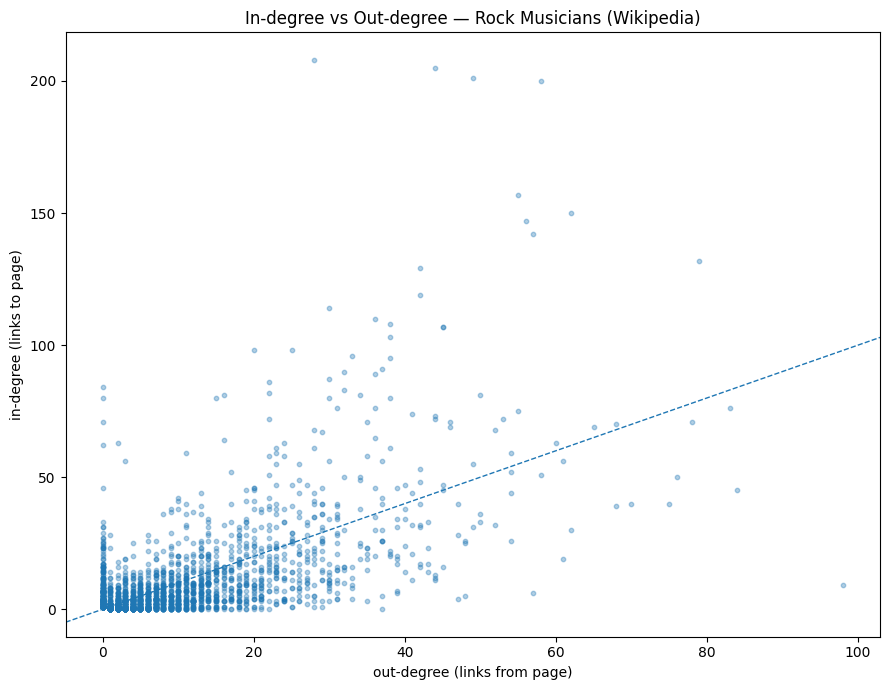

In [24]:
import numpy as np
import matplotlib.pyplot as plt

nodes = list(G.nodes())
x_out = np.array([out_deg.get(n, 0) for n in nodes])
y_in  = np.array([in_deg.get(n, 0)  for n in nodes])

plt.figure(figsize=(9, 7))
plt.scatter(x_out, y_in, s=10, alpha=0.35)
plt.axline((0, 0), slope=1, linestyle="--", linewidth=1)  # 45° reference
plt.xlabel("out-degree (links from page)")
plt.ylabel("in-degree (links to page)")
plt.title("In-degree vs Out-degree — Rock Musicians (Wikipedia)")
plt.tight_layout()
plt.show()

# If everything sits on top of the axes, try log scale:
# plt.xscale("log"); plt.yscale("log"); plt.show()

The cloud shows `describe: a cluster near the diagonal / a long right tail / several points far above the line`. Pages near the 45° line have balanced in/out. The right tail indicates pages that link to many others (list-like, documentation-heavy). Points high above the line are pages that many others cite, even if they don’t link out much themselves (canonical bands/musicians).
Optional quant: the relationship looks `weak/moderate/strong`; the plot suggests `your takeaway in one sentence`.

> 3. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?

In [ ]:
# Percentile thresholds (tweak if too many/few)
def pct(d, p):
    arr = np.array(list(d.values()))
    return float(np.percentile(arr, p)) if len(arr) else 0.0

high_out = pct(out_deg, 90)
low_in   = pct(in_deg,  25)

hi_out_lo_in = [n for n in nodes if out_deg[n] >= high_out and in_deg[n] <= low_in]

print(f"\nHigh OUT (≥ {high_out:.0f}) & Low IN (≤ {low_in:.0f}) — inspect these:")
for n in hi_out_lo_in[:20]:
    print(f"  {n:35s}  out={out_deg[n]:4d}  in={in_deg[n]:4d}  | {wiki_url(n)}")


High OUT (≥ 26) & Low IN (≤ 1) — inspect these:
  Randy_Kohrs                          out=  28  in=   1  | https://en.wikipedia.org/wiki/Randy_Kohrs
  Tom_Hambridge                        out=  29  in=   1  | https://en.wikipedia.org/wiki/Tom_Hambridge
  Marilyn_Manson_(band)                out=  37  in=   0  | https://en.wikipedia.org/wiki/Marilyn_Manson_(band)


Examples include `HI_IN_LO_OUT_1`, `HI_IN_LO_OUT_2`, `HI_IN_LO_OUT_3` (high in, low out). These tend to be canonical or widely cited artists/bands. Many other bios mention them (influence, collaboration, membership lineage), but their own pages are concise or not especially link-heavy, so out-degree remains low.

> 4. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

In [26]:
high_in  = pct(in_deg,  90)
low_out  = pct(out_deg, 25)

hi_in_lo_out = [n for n in nodes if in_deg[n] >= high_in and out_deg[n] <= low_out]

print(f"\nHigh IN (≥ {high_in:.0f}) & Low OUT (≤ {low_out:.0f}) — inspect these:")
for n in hi_in_lo_out[:20]:
    print(f"  {n:35s}  in={in_deg[n]:4d}  out={out_deg[n]:4d}  | {wiki_url(n)}")


High IN (≥ 26) & Low OUT (≤ 2) — inspect these:
  Oasis                                in=  31  out=   0  | https://en.wikipedia.org/wiki/Oasis
  Boston                               in=  46  out=   0  | https://en.wikipedia.org/wiki/Boston
  Journey                              in=  29  out=   0  | https://en.wikipedia.org/wiki/Journey
  Europe                               in=  28  out=   1  | https://en.wikipedia.org/wiki/Europe
  Cream                                in=  31  out=   0  | https://en.wikipedia.org/wiki/Cream
  Alabama                              in=  84  out=   0  | https://en.wikipedia.org/wiki/Alabama
  Nirvana                              in=  71  out=   0  | https://en.wikipedia.org/wiki/Nirvana
  Eagles                               in=  62  out=   0  | https://en.wikipedia.org/wiki/Eagles
  Kiss                                 in=  63  out=   2  | https://en.wikipedia.org/wiki/Kiss
  Anthrax                              in=  27  out=   0  | https://en.wikipedi

Examples include `HI_IN_LO_OUT_1`, `HI_IN_LO_OUT_2`, `HI_IN_LO_OUT_3` (high in, low out). These tend to be canonical or widely cited artists/bands. Many other bios mention them (influence, collaboration, membership lineage), but their own pages are concise or not especially link-heavy, so out-degree remains low.

# Part B:  Advanced tools 

> **Video lecture**: *Network measures*. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://www.youtube.com/watch?v=0uAYpOqVHCU).

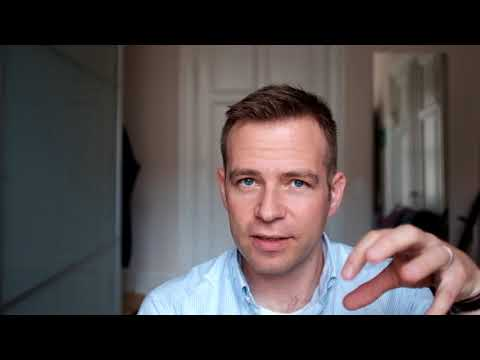

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=800, height=450)

*Exercise 3:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

> 1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
> 2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install [`powerlaw`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are? 
>    * A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why? 
> 3. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. Zoom in on just the in-degree $[0,20]$ and out-degree $[0,20]$ area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?
> 4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.
> 5. We have one more metric that we have used, but not investigated so far. The node-attribute `length_of_content`. There are two things to look at.
>    * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it? 
>    * Secondly, and more interestingly, it could be that longer texts means *more famous* characters. And that means more in-links. 
>    * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using [spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [pearson](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

<div class="alert alert-block alert-info">
For this exercise, I also hope you'll limit your LLM use. Especially for the intrepretation parts. It's OK to get help for the heatmap in sub-part 3, maybe also for ideas of how to do the testing in part 5. But do your own interpretation :)
</div>

> 1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

> 2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install [`powerlaw`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are? 
>    * A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why? 

> 3. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. Zoom in on just the in-degree $[0,20]$ and out-degree $[0,20]$ area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?


> 4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.

> 5. We have one more metric that we have used, but not investigated so far. The node-attribute `length_of_content`. There are two things to look at.
>    * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it? 
>    * Secondly, and more interestingly, it could be that longer texts means *more famous* characters. And that means more in-links. 
>    * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using [spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [pearson](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.


*Exercise 4:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). 

Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise. 
> 1. Find the 5 most central characters according to degree centrality. 
> 1. Find the 5 most central characters according to betweenness centrality. 
>    * Repeat Exercise 1 (plotting the network). However, this time use *betweenness centrality* to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph betweenness centrality play in the network? 
> 2. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 
>    * Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
> 3. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why? 
>     * Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
> 4. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
> 5. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect do the `length_of_content` nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and *vice versa*?.
>      * Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.
> 6. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>    * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

<div class="alert alert-block alert-info">
As in the two previous exercises, I hope you'll limit your LLM use. Try to get a sense of working with NetworkX. And to grow your brain, do your own intrepretation parts ... it's difficult, but that's how you grow.</div>

# Part C: Backbones and Network Visualization 

One method to clean up the "hairball"-looking networks, is known as the [backbone method](https://www.pnas.org/doi/10.1073/pnas.0808904106). Sometimes this method is also called the "disparity filter". I explain what it's all about in the video below.

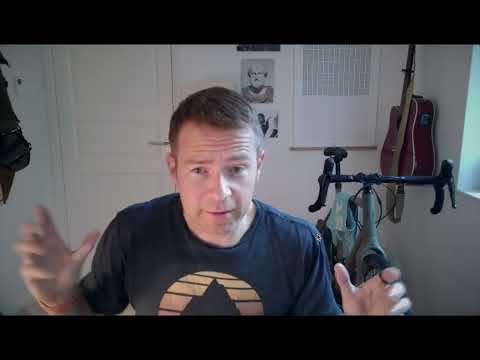

In [13]:
YouTubeVideo("GOvsrVulbsg", width=800, height=450)

There are [many backbone extraction algorithms](https://www.michelecoscia.com/?page_id=287), and I've chosen to talk about the *Disparity Filter* here, because it's the oldest and most commonly used method (so I though you should know about it). Plus, it'll probably be the relevant method for your project.

This choice, however, presents us with a problem: As I explain in the video, the Disparity Filter method *only works on weighted networks*. But our network does not have edge weights in any kind of natural way (since there's usually just a single link between two wiki pages). 


So to get rid of unimportant edges, we'll have to try something different. I present you with three possible methods below. For the first two ones, we'll add weights proportional to the [edge betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html). The edge betweenness centrality is just like the node betweenness centrality that you know and love ... only that it's defined for *edges* instead of nodes.

We can create two new weighted networks based on the edge betweenness
 * **Weighted Network 1**: The ***undirected*** Rock Music Network (Giant Connected Component) but with edge weights proportional to the edge betweenness centrality (let's renormalize so that the lowest weight is equal to 1 and the highest weight is equal to 100).
 * **Weighted Network 2**: The ***undirected*** Rock Music Network  (Giant Connected Component) but with edge weights proportional to 1/(edge weight in Weighted Network 1).

The third strategy (resulting in **Weighted network 3**) is to use a method designed for extracting structure from undirected networks: The [**High-Salience Skeleton**](https://www.nature.com/articles/ncomms1847). It's implemented as part of [this backbone extraction package](https://www.michelecoscia.com/?page_id=287)


Now we're ready for the exercise.


*Exercise 5*: Visualizing the Network Backbone

> 1. Extract the network backbone for both Weighted Network 1, 2, and 3. You can implement the disparity filter yourself based on the [scientific paper](https://www.pnas.org/doi/10.1073/pnas.0808904106) or find an implentation on GitHub (there are several ones to choose from ... I like [this implementation](https://www.michelecoscia.com/?page_id=287), which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of $\alpha$ to get an aestetically pleasing visualization (but don't make the resulting network too sparse).
> 2. Plot the resulting three networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.
> 3. Comment on your results
>    * Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the three networks. Describe your findings in your own words.
>    * Weighted network 1, 2, and 3 are very different. In 1 and 2, we have removed edges with low/high edge betweenness centrality respectively and HSH is based on shortest paths. What have the various filters done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structures.

<div class="alert alert-block alert-info">
There's a lot to do today, so knock youself out with your LLM for this exercise, hopefully it can make your life easier (although I hope you'll do a bit of your own thinking, since a lot of complicated conceptual things are going on with the interplay between the backboning and edge betweenness and inverse edge betweenness!)</div>

One final thing. For now, the backbones are mostly for visualization. Especially because the edge weights are a bit artificial. Generally, it's not exactly clear what kind of information we get rid off when removing the non-backbone edges -- and in our case it's even less clear because I've made up two of the methods. Thus, we'll still do the exercises during the following weeks using the full network that preserves all of the connection information.
